In [1]:
import pandas as pd
import numpy as np
import re

#Load the companies and rounds2 data 
companies = pd.read_csv("companies.csv",encoding='PALMOS')
rounds2   = pd.read_csv("rounds2.csv",encoding='PALMOS')

#other possible eccoding options
#encoding = "ISO-8859-1"/"utf-8"/"cp1252"/unicode_escape
#engine="python"

In [2]:
companies.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/Ã”Asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/Ä°Novatiff-Reklam-Ve-Tanä±Tä±M-H...,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


In [3]:
#code to remove non-ascii characters
rounds2["company_permalink"] = rounds2["company_permalink"].apply(lambda x:re.sub(r'[^\x00-\x7f]',r'',x))
companies["permalink"]       = companies["permalink"].apply(lambda x:re.sub(r'[^\x00-\x7f]',r'',x))

In [4]:
companies.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/Eron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/Asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/Novatiff-Reklam-Ve-TanTM-Hizmetl...,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


In [5]:
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/organization/novatiff-reklam-ve-tantm-hizmetl...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


In [6]:
companies.info() #66368 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [7]:
rounds2.info() #114949 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [8]:
#How many unique companies are present in rounds2?
#ans:90247
rounds2.groupby(['company_permalink']).nunique()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
company_permalink,,,,,,
/ORGANIZATION/-QOUNTER,1,1,1,1,1,0
/ORGANIZATION/-THE-ONE-OF-THEM-INC-,1,1,1,1,1,1
/ORGANIZATION/004-TECHNOLOGIES,1,1,1,0,1,0
/ORGANIZATION/0NDINE-BIOMEDICAL-INC,1,1,1,0,1,1
/ORGANIZATION/0XDATA,1,2,2,0,2,2
...,...,...,...,...,...,...
/organization/zyraz-technology,1,2,2,0,2,2
/organization/zyrra,1,2,2,0,2,2
/organization/zystor,1,1,1,1,1,1


In [9]:
#How many unique companies are present in companies?
#ans:66368 
companies.groupby(['permalink']).nunique()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
permalink,,,,,,,,,,
/Organization/-Fame,1,1,1,1,1,1,1,1,1,0
/Organization/-Qounter,1,1,1,1,1,1,1,1,1,1
/Organization/-The-One-Of-Them-Inc-,1,1,1,1,1,0,0,0,0,0
/Organization/0-6-Com,1,1,1,1,1,1,1,1,1,1
/Organization/004-Technologies,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
/Organization/Zystor,1,1,1,1,1,1,1,1,1,0
/Organization/Zytoprotec,1,1,1,1,1,1,1,1,1,1
/Organization/Zzish,1,1,1,1,1,1,1,1,1,1


In [10]:
#set permalink as unique key for each company
companies.set_index('permalink',inplace=True)

In [11]:
#Are there any companies in the rounds2 file which are not present in companies?
#yes

In [12]:
#converting company permalink to lower case
companies.index = companies.index.str.lower()
rounds2["company_permalink"] = rounds2["company_permalink"].str.lower()

In [13]:
#finding uniques after converting to lower case
rounds2.groupby(['company_permalink']).nunique()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
company_permalink,,,,,,
/organization/-fame,1,1,1,1,1,1
/organization/-qounter,1,2,2,1,2,1
/organization/-the-one-of-them-inc-,1,1,1,1,1,1
/organization/0-6-com,1,1,1,1,1,1
/organization/004-technologies,1,1,1,0,1,0
...,...,...,...,...,...,...
/organization/zystor,1,1,1,1,1,1
/organization/zytoprotec,1,1,1,1,1,1
/organization/zzish,1,3,3,0,3,2


In [14]:
#Are there any companies in the rounds2 file which are not present in companies?
#No after converting to lowe case

In [15]:
rounds2.rename(columns = {"company_permalink":"permalink"}, inplace = True)

In [16]:
rounds2.tail()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/organization/novatiff-reklam-ve-tantm-hizmetl...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


In [17]:
master_frame = pd.merge(rounds2,companies,'inner','permalink')

In [18]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   name                     114948 non-null  object 
 7   homepage_url             108815 non-null  object 
 8   category_list            111539 non-null  object 
 9   status                   114949 non-null  object 
 10  country_code             106271 non-null  object 
 11  state_code               104003 non-null  object 
 12  region                   104782 non-null  object 
 13  city                     104785 non-null  object 
 14  foun

In [19]:
#Calculate the most representative value 
#of the investment amount for each of the four funding types (venture, angel, seed, and private equity)
master_frame.head(20)

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [20]:
master_frame["raised_amount_usd"].unique()

array([10000000.,       nan,   700000., ...,  2686600.,    41313.,
          14851.])

In [21]:
not_number_values = master_frame[master_frame["raised_amount_usd"].isnull()]
not_number_values
#outof 1.14L observations,20K observation have raised_amount_usd = nan

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
14,/organization/1,/funding-round/5de6d8828aef7d925d97918d15727670,undisclosed,NaN,05-02-2013,NaN,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
17,/organization/1-4-all,/funding-round/e97a192e13ea0ee3c4f71136b4f3ec16,equity_crowdfunding,NaN,21-04-2013,NaN,1-4 All,NaN,Entertainment|Games|Software,operating,USA,NC,NC - Other,Connellys Springs,NaN
18,/organization/1-618-technology,/funding-round/83b8f4c7d37ecef5e001a5e953bf461a,equity_crowdfunding,NaN,22-01-2014,NaN,1.618 Technology,http://www.Homeandcondogallery.com,Networking|Real Estate|Web Hosting,operating,USA,FL,Orlando,Orlando,07-12-2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114899,/organization/zymr-inc-,/funding-round/9048d1a80edeae803ed1790c9f473eec,angel,NaN,12-12-2012,NaN,"Zymr, Inc.",http://www.zymr.com,Android|Apps|Cloud Computing|Cloud Infrastruct...,operating,USA,CA,SF Bay Area,Santa Clara,NaN
114905,/organization/zynergy-projects-services,/funding-round/3d7dbd2d92220d93e2b5455f914a0918,venture,NaN,19-08-2015,NaN,Zynergy Projects & Services,http://www.zynergygroup.net/,Clean Technology,operating,IND,25,Chennai,Chennai,NaN
114913,/organization/zynga,/funding-round/d27f10a20b15b4ef3d9961d54eabf6b1,angel,NaN,01-01-2007,NaN,Zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,01-07-2007
114927,/organization/zypsee,/funding-round/c67e22c5448435adaf5a2d101e449dde,seed,NaN,26-07-2013,NaN,Whisk (formerly Zypsee),http://whisk.me,Public Transportation,operating,USA,NY,New York City,New York,01-01-2011


In [22]:
#no of rows before removing NaN raised_amount_usd rows = 114949 
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   name                     114948 non-null  object 
 7   homepage_url             108815 non-null  object 
 8   category_list            111539 non-null  object 
 9   status                   114949 non-null  object 
 10  country_code             106271 non-null  object 
 11  state_code               104003 non-null  object 
 12  region                   104782 non-null  object 
 13  city                     104785 non-null  object 
 14  foun

In [23]:
# removing NaN raised_amount_usd rows
master_frame = master_frame[~np.isnan(master_frame["raised_amount_usd"])]

In [24]:
#no of rows after removing NaN raised_amount_usd rows = 94959 
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94959 entries, 0 to 114948
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                94959 non-null  object 
 1   funding_round_permalink  94959 non-null  object 
 2   funding_round_type       94959 non-null  object 
 3   funding_round_code       28169 non-null  object 
 4   funded_at                94959 non-null  object 
 5   raised_amount_usd        94959 non-null  float64
 6   name                     94958 non-null  object 
 7   homepage_url             90627 non-null  object 
 8   category_list            93915 non-null  object 
 9   status                   94959 non-null  object 
 10  country_code             89108 non-null  object 
 11  state_code               87355 non-null  object 
 12  region                   87911 non-null  object 
 13  city                     87914 non-null  object 
 14  founded_at           

In [25]:
#the most representative value of the investment amount for funding types
master_frame_fundingtypes_investment = master_frame.groupby(["funding_round_type"]).median()
master_frame_fundingtypes_investment

,raised_amount_usd
funding_round_type,
angel,400000.0
convertible_note,272000.0
debt_financing,1100000.0
equity_crowdfunding,100000.0
grant,201684.0
non_equity_assistance,60000.0
post_ipo_debt,19950000.0
post_ipo_equity,12262852.5
private_equity,20000000.0


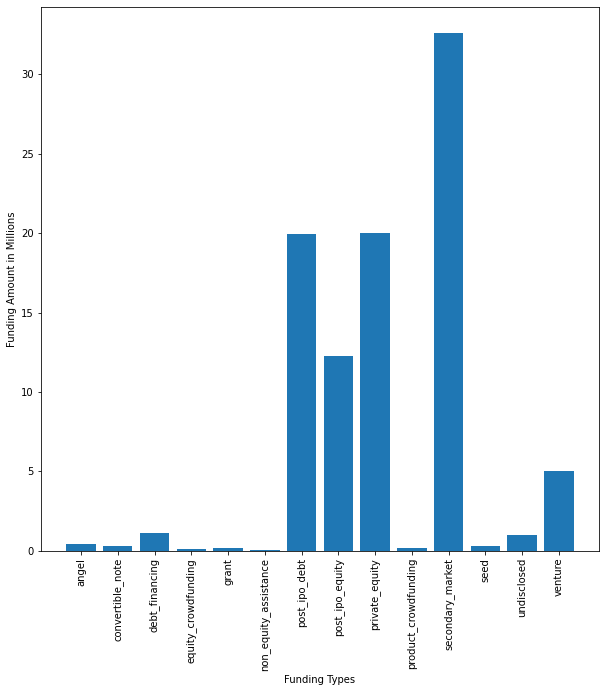

In [26]:
#A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds. 
from matplotlib import pyplot as plt
plt.subplots(figsize=(10,10))
plt.bar(master_frame_fundingtypes_investment.index,master_frame_fundingtypes_investment["raised_amount_usd"]/1000000)
plt.xlabel("Funding Types")
plt.ylabel("Funding Amount in Millions")
plt.xticks(rotation=90)
plt.show()

#from the below graph we observe that "venture" and "post_ipo_equity" fall in the range 5million-15million specified by Spark Funds

In [27]:
#investment type that fall into constraints of Spark Funds 5 to 15 million USD
master_frame_fundingtypes_investment = master_frame_fundingtypes_investment[master_frame_fundingtypes_investment["raised_amount_usd"] >= 5000000]
master_frame_fundingtypes_investment = master_frame_fundingtypes_investment[master_frame_fundingtypes_investment["raised_amount_usd"] <= 15000000]
master_frame_fundingtypes_investment

,raised_amount_usd
funding_round_type,
post_ipo_equity,12262852.5
venture,5000000.0


In [28]:
#Based on the most representative investment amount ,
#which investment type out of (venture, angel, seed, and private equity) do you think is the most suitable for Spark Funds?
#venture

<h3>country analysis</h3>

In [29]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94959 entries, 0 to 114948
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                94959 non-null  object 
 1   funding_round_permalink  94959 non-null  object 
 2   funding_round_type       94959 non-null  object 
 3   funding_round_code       28169 non-null  object 
 4   funded_at                94959 non-null  object 
 5   raised_amount_usd        94959 non-null  float64
 6   name                     94958 non-null  object 
 7   homepage_url             90627 non-null  object 
 8   category_list            93915 non-null  object 
 9   status                   94959 non-null  object 
 10  country_code             89108 non-null  object 
 11  state_code               87355 non-null  object 
 12  region                   87911 non-null  object 
 13  city                     87914 non-null  object 
 14  founded_at           

In [30]:
master_frame.head(10)

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [31]:
# top nine countries which have received the highest total funding
master_frame_countrywise_investment = master_frame[master_frame['funding_round_type'] == 'venture'].groupby(["country_code"]).sum()

In [32]:
master_frame_countrywise_investment = master_frame_countrywise_investment.sort_values(by=["raised_amount_usd"],ascending=False)

In [33]:
top9  = master_frame_countrywise_investment[0:9]
top9

,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
FRA,7.259537e+09
ISR,6.907515e+09
DEU,6.346960e+09
JPN,3.363677e+09


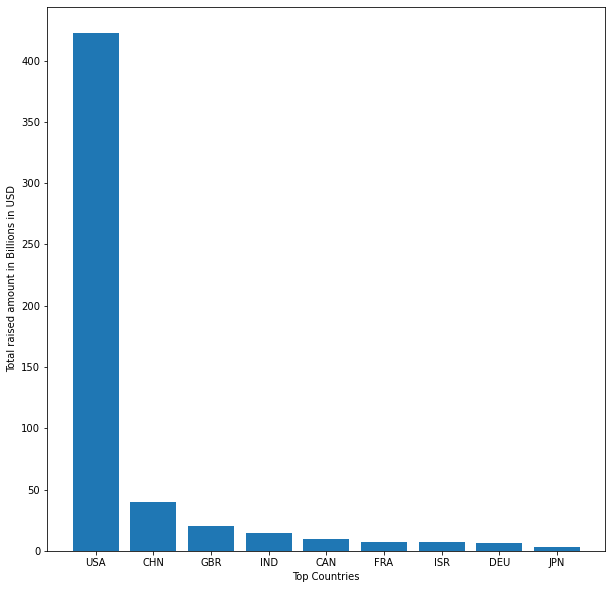

In [34]:
#A plot showing the top 9 countries against the total amount of investments of funding type FT.
plt.subplots(figsize=(10,10))
plt.bar(top9.index,top9["raised_amount_usd"]/1000000000)
plt.xlabel("Top Countries")
plt.ylabel("Total raised amount in Billions in USD")
plt.show()
#below graph shows us the top countries with maximum investments

In [35]:
#Identify the top three English-speaking countries in the data frame top9.
#USA,GBR,IND

<h3>sector analysis</h3>

In [36]:
#Extract the primary sector of each category list from the category_list column

In [37]:
master_frame.info() #93915 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94959 entries, 0 to 114948
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                94959 non-null  object 
 1   funding_round_permalink  94959 non-null  object 
 2   funding_round_type       94959 non-null  object 
 3   funding_round_code       28169 non-null  object 
 4   funded_at                94959 non-null  object 
 5   raised_amount_usd        94959 non-null  float64
 6   name                     94958 non-null  object 
 7   homepage_url             90627 non-null  object 
 8   category_list            93915 non-null  object 
 9   status                   94959 non-null  object 
 10  country_code             89108 non-null  object 
 11  state_code               87355 non-null  object 
 12  region                   87911 non-null  object 
 13  city                     87914 non-null  object 
 14  founded_at           

In [38]:
#drop rows with null category_list
master_frame = master_frame[~master_frame["category_list"].isnull()]#this can be done along with dropping null values from raise_amt_usd
master_frame

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114943,/organization/zzzzapp-com,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,01-08-2013,33149.0,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [39]:
#Extract the primary sector of each category list
master_frame["primary_sector"] = master_frame["category_list"].apply(lambda x:x.split('|')[0])

In [40]:
master_frame.head(10)

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,Games
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics


In [41]:
#read mapping.csv file
mapping = pd.read_csv("mapping.csv",encoding="utf-8")
mapping.info() #688 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [42]:
mapping.head(60)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


<h3>cleaning/formatting mapping.csv</h3>

In [43]:
#remove null category_list values 
mapping = mapping[1:]

In [44]:
#from the above data we observed that string 'na' is replaced by  0 eg:Alter0tive Medicine

mapping["category_list"] = mapping["category_list"].apply(lambda x:x.replace('0','na'))
mapping["category_list"] = mapping["category_list"].str.lower()

In [45]:
#unique category list in mapping dataframe
mapping.groupby(['category_list']).nunique() #687

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
category_list,,,,,,,,,,
3d,1,1,1,1,1,1,1,1,1,1
3d printing,1,1,1,1,1,1,1,1,1,1
3d technology,1,1,1,1,1,1,1,1,1,1
accounting,1,1,1,1,1,1,1,1,1,1
active lifestyle,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
wholesale,1,1,1,1,1,1,1,1,1,1
wine and spirits,1,1,1,1,1,1,1,1,1,1
wireless,1,1,1,1,1,1,1,1,1,1


In [46]:
#unique category list(primary sector) in master_frame dataframe
master_frame["primary_sector"] = master_frame["primary_sector"].str.lower()
master_frame.groupby(["primary_sector"]).nunique() #715 

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
primary_sector,,,,,,,,,,,,,,,,
3d,128,215,9,5,187,162,128,124,126,4,30,52,66,83,81,1
3d printing,72,112,8,4,101,87,72,67,57,3,20,32,37,49,46,1
3d technology,31,47,8,3,47,38,31,30,30,2,14,19,24,26,19,1
accounting,111,220,11,6,201,142,111,110,108,4,23,42,51,62,78,1
active lifestyle,25,33,7,2,29,28,25,24,25,2,8,14,17,18,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wholesale,4,4,3,0,4,4,4,4,1,1,2,3,3,3,4,1
wine and spirits,10,13,5,1,13,13,10,10,1,1,4,7,9,9,9,1
wireless,15,20,6,3,20,19,15,13,1,4,4,9,10,12,8,1


In [47]:
# unique "primary sectors" in main_frame are more than unique "category_list" present in mapping file


In [ ]:
#find unmatched category_list which are not present in mapping.csv but available in main_frame
unmatched_category_lists = master_frame["primary_sector"].apply(lambda x:False if(mapping["category_list"].str.contains(x).sum()>=1) else True)
master_frame[unmatched_category_lists]["primary_sector"].unique()


In [ ]:
#create main_sector column
main_sector  = []
column_names = mapping.columns
for i in range(0,mapping["category_list"].count()) :
    for j in range(1,len(column_names)):
        if mapping.iloc[i,j] == 1:
            main_sector.append(column_names[j])

mapping['main_sector'] = main_sector
mapping.head()
    

In [ ]:
#create new dataframe mapping_with_main_sector containg mapping of category list to its main sector
mapping_with_main_sector = pd.DataFrame()
mapping_with_main_sector['primary_sector'] = mapping['category_list']
mapping_with_main_sector['main_sector'] = mapping['main_sector']
mapping_with_main_sector["main_sector"] = mapping_with_main_sector["main_sector"].str.lower()
mapping_with_main_sector


In [ ]:
#map each primary sector to one of the eight main sectors
master_frame2 = pd.merge(master_frame,mapping_with_main_sector,'inner','primary_sector')
master_frame2

In [ ]:
#Three data frames D1, D2 and D3 
#Create three separate data frames D1, D2 and D3 
#for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range.
D1 = master_frame2[(master_frame2["country_code"] == "USA") & (master_frame2["funding_round_type"]=="venture") & 
                   (master_frame2["raised_amount_usd"]>=5000000) & (master_frame2["raised_amount_usd"]<=15000000)]
D2 = master_frame2[(master_frame2["country_code"] == "GBR") & (master_frame2["funding_round_type"]=="venture") & 
                   (master_frame2["raised_amount_usd"]>=5000000) & (master_frame2["raised_amount_usd"]<=15000000)]
D3 = master_frame2[(master_frame2["country_code"] == "IND") & (master_frame2["funding_round_type"]=="venture") & 
                   (master_frame2["raised_amount_usd"]>=5000000) & (master_frame2["raised_amount_usd"]<=15000000)]

In [ ]:
#D3.info()
D3["raised_amount_usd"].sum()


In [ ]:
#total number of investments and the total amount of investments in each main sector for each of the three countries

In [ ]:
#for USA
D1_per_main_sector = D1.groupby(["main_sector"])
D1_per_main_sector.count()["permalink"].sort_values(ascending=False)
#top 3 sectors which received highest number of investments
#others                                     2950
#social, finance, analytics, advertising    2714
#cleantech / semiconductors                 2350

D1_per_main_sector.sum()["raised_amount_usd"].sort_values(ascending=False)
#top 3 sectors which received highest total amount of investments
#others                                     2.632101e+10 
#social, finance, analytics, advertising    2.380738e+10
#cleantech / semiconductors                 2.163343e+10

In [ ]:
#which company received the highest investment under "others" sector
D1_others_group = D1_per_main_sector.get_group('others')
D1_others_group.groupby(["permalink"]).sum()["raised_amount_usd"].sort_values(ascending=False)
companies[companies.index.str.contains('/organization/virtustream')]


In [ ]:
#which company received the highest investment under "social, finance, analytics, advertising" sector
D1_social_finance_analytics_advertising_group = D1_per_main_sector.get_group('social, finance, analytics, advertising')
D1_social_finance_analytics_advertising_group.groupby(["permalink"]).sum()["raised_amount_usd"].sort_values(ascending=False)
companies[companies.index.str.contains('/organization/shotspotter')]

In [ ]:
#for GBR
D2_per_main_sector = D2.groupby(["main_sector"])
D2_per_main_sector.count()["permalink"].sort_values(ascending=False)
#top 3 sectors which received highest number of investments
#others                                     147
#social, finance, analytics, advertising    133
#cleantech / semiconductors                 130

D2_per_main_sector.sum()["raised_amount_usd"].sort_values(ascending=False)
#top 3 sectors which received highest total amount of investments
#others                                     1.283624e+09
#cleantech / semiconductors                 1.163990e+09
#social, finance, analytics, advertising    1.089404e+09

In [ ]:
#which company received the highest investment under "others" sector
D2_others_group = D2_per_main_sector.get_group('others')
D2_others_group.groupby(["permalink"]).sum()["raised_amount_usd"].sort_values(ascending=False)
companies[companies.index.str.contains('/organization/electric-cloud')]


In [ ]:
#which company received the highest investment under "social, finance, analytics, advertising" sector
D2_social_finance_analytics_advertising_group = D2_per_main_sector.get_group('social, finance, analytics, advertising')
D2_social_finance_analytics_advertising_group.groupby(["permalink"]).sum()["raised_amount_usd"].sort_values(ascending=False)
companies[companies.index.str.contains('/organization/celltick-technologies')]

In [ ]:
#for IND
#total number of investments per sector
D3_per_main_sector = D3.groupby(["main_sector"])
D3_per_main_sector.count()["permalink"].sort_values(ascending=False)
#top 3 sectors which received highest number of investments
#others                                     110
#social, finance, analytics, advertising     60
#news, search and messaging                  52

D3_per_main_sector.sum()["raised_amount_usd"].sort_values(ascending=False)
#top 3 sectors which received highest total amount of investments
#others                                     1.013410e+09
#social, finance, analytics, advertising    5.505496e+08
#news, search and messaging                 4.338345e+08

In [ ]:
#which company received the highest investment under "others" sector
D3_others_group = D3_per_main_sector.get_group('others')
D3_others_group.groupby(["permalink"]).sum()["raised_amount_usd"].sort_values(ascending=False)
companies[companies.index.str.contains('/organization/firstcry-com')]

In [ ]:
#which company received the highest investment under "social, finance, analytics, advertising" sector
D3_social_finance_analytics_advertising_group = D3_per_main_sector.get_group('social, finance, analytics, advertising')
D3_social_finance_analytics_advertising_group.groupby(["permalink"]).sum()["raised_amount_usd"].sort_values(ascending=False)
companies[companies.index.str.contains('/organization/manthan-systems')]

In [ ]:
#A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart
D1_per_main_sector = D1.groupby(["main_sector"])
D2_per_main_sector = D2.groupby(["main_sector"])
D3_per_main_sector = D3.groupby(["main_sector"])
for_USA = D1_per_main_sector.count()["permalink"].sort_values(ascending=False)[0:3]
for_GBR = D2_per_main_sector.count()["permalink"].sort_values(ascending=False)[0:3]
for_IND = D3_per_main_sector.count()["permalink"].sort_values(ascending=False)[0:3]
X = np.arange(3)

In [ ]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.bar(X + 0.00, for_USA, color = 'b', width = 0.25,label ='USA')
ax.bar(X + 0.25, for_GBR, color = 'g', width = 0.25,label ='GBR')
ax.bar(X + 0.50, for_IND, color = 'r', width = 0.25,label ='IND')
plt.xlabel('Top three sectors')
plt.ylabel('Total count of investments in top sectors')
